# Verify complexity of selection sort using `countop`

In [2]:
from countop import Integer
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
# Create a quick selection sort function
def selection_sort(x):
    n = len(x)
    if n == 0 or n == 1:
        return x
    
    for i in range(n - 1):
        # Find the minimum element in x[i, .. ,n - 1] manually
        imin = i
        for j in range(i + 1, n):
            if x[j] < x[imin]:
                imin = j
        
        # Replace x[i] with x[imin]
        temp = x[i]
        x[i] = x[imin]
        x[imin] = temp
    return x

In [4]:
# Basic sorting example
n = 10
x = [Integer(j) for j in range(n, 0, -1)]
Integer.reset_counts()
print 'Comparisons before sorting: {}'.format(Integer.comparisons())
selection_sort(x)
print 'Comparisons after sorting: {}'.format(Integer.comparisons())

Comparisons before sorting: 0
Comparisons after sorting: 45


In [5]:
# Basic max operation
Integer.reset_counts()
print 'Comparisons before sorting: {}'.format(Integer.comparisons())
print 'max(x) = {}'.format(max(x))
print 'Comparisons after sorting: {}'.format(Integer.comparisons())

Comparisons before sorting: 0
max(x) = 10
Comparisons after sorting: 9


In [6]:
# Obtain number of comparisons for various input sizes
exp_array = np.arange(0, 12, 1)
n_array = 2**exp_array
comp_array = np.zeros(len(n_array), int)
for i, n in enumerate(n_array):
    Integer.reset_counts()
    selection_sort([Integer(j) for j in range(n, 0, -1)])
    comp_array[i] = Integer.comparisons()

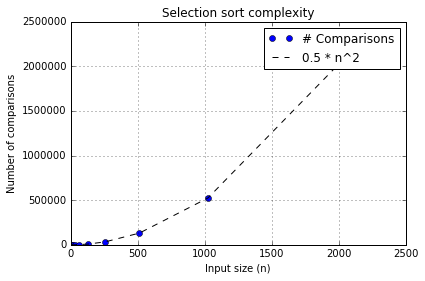

In [7]:
# Plot number of comparisons against input size
plt.figure(1)
plt.hold(True)
plt.plot(n_array, comp_array, 'o')
plt.plot(n_array, 0.5*n_array*n_array, 'k--')
plt.legend(('# Comparisons', '0.5 * n^2'))
plt.xlabel('Input size (n)')
plt.ylabel('Number of comparisons')
plt.title('Selection sort complexity')
plt.grid(True)